# Barcelona Open Data Analysis

The following analysis is based on openly available data, collected from https://www.kaggle.com/xvivancos/barcelona-data-sets/home and published by the city.

This initial data exploration will focus on the demography of the city. Being an immigrant myself, I will focus on the migration flows.

## Data Exploration

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
immigrants_nationality = pd.read_csv("input/immigrants_by_nationality.csv")

In [3]:
immigrants_nationality.shape

(35224, 7)

In [4]:
immigrants_nationality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35224 entries, 0 to 35223
Data columns (total 7 columns):
Year                 35224 non-null int64
District Code        35224 non-null int64
District Name        35224 non-null object
Neighborhood Code    35224 non-null int64
Neighborhood Name    35224 non-null object
Nationality          35224 non-null object
Number               35224 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [5]:
immigrants_nationality.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


In [6]:
immigrants_nationality.describe()

,Year,District Code,Neighborhood Code,Number
count,35224.000000,35224.000000,35224.000000,35224.000000
mean,2016.010504,7.500000,37.837838,7.707273
std,0.810846,11.061717,22.119174,50.421883
min,2015.000000,1.000000,1.000000,0.000000
25%,2015.000000,4.000000,19.000000,0.000000
50%,2016.000000,7.000000,37.500000,0.000000
75%,2017.000000,8.000000,56.000000,2.000000
max,2017.000000,99.000000,99.000000,1603.000000


In [14]:
spanish_immigrants = immigrants_nationality[immigrants_nationality.Nationality == "Spain"]

## Graphical investigation of immigrant movements

### Overall immigrant movement

In [44]:
unique_years = list(set(immigrants_nationality["Year"]))
immigration_per_year = [sum(immigrants_nationality["Number"][immigrants_nationality["Year"]==year]) for year in unique_years]

In [45]:
unique_years.sort()

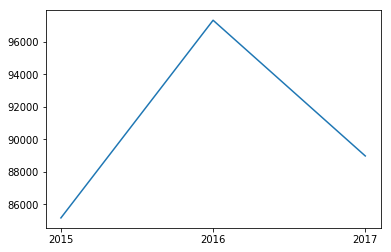

In [53]:
ax = plt.subplot(1,1,1)
plt.plot(unique_years,immigration_per_year)
ax.set_xticks(unique_years)
plt.show()

### Plotting the number of spanish immigrants to each neighborhood in Barcelona

In [15]:
unique_neighborhoods = set(spanish_immigrants["Neighborhood Name"])

In [16]:
unique_neighborhoods

{'Baró de Viver',
 'Can Baró',
 'Can Peguera',
 'Canyelles',
 'Ciutat Meridiana',
 'Diagonal Mar i el Front Marítim del Poblenou',
 'Horta',
 'Hostafrancs',
 'Montbau',
 'Navas',
 'No consta',
 'Pedralbes',
 'Porta',
 'Provençals del Poblenou',
 'Sant Andreu',
 'Sant Antoni',
 'Sant Genís dels Agudells',
 'Sant Gervasi - Galvany',
 'Sant Gervasi - la Bonanova',
 'Sant Martí de Provençals',
 'Sant Pere, Santa Caterina i la Ribera',
 'Sants',
 'Sants - Badal',
 'Sarrià',
 'Torre Baró',
 'Vallbona',
 'Vallcarca i els Penitents',
 'Vallvidrera, el Tibidabo i les Planes',
 'Verdun',
 'Vilapicina i la Torre Llobeta',
 'el Baix Guinardó',
 'el Barri Gòtic',
 'el Besòs i el Maresme',
 'el Bon Pastor',
 "el Camp d'en Grassot i Gràcia Nova",
 "el Camp de l'Arpa del Clot",
 'el Carmel',
 'el Clot',
 'el Coll',
 'el Congrés i els Indians',
 'el Fort Pienc',
 'el Guinardó',
 'el Parc i la Llacuna del Poblenou',
 'el Poble Sec',
 'el Poblenou',
 'el Putxet i el Farró',
 'el Raval',
 'el Turó de la P

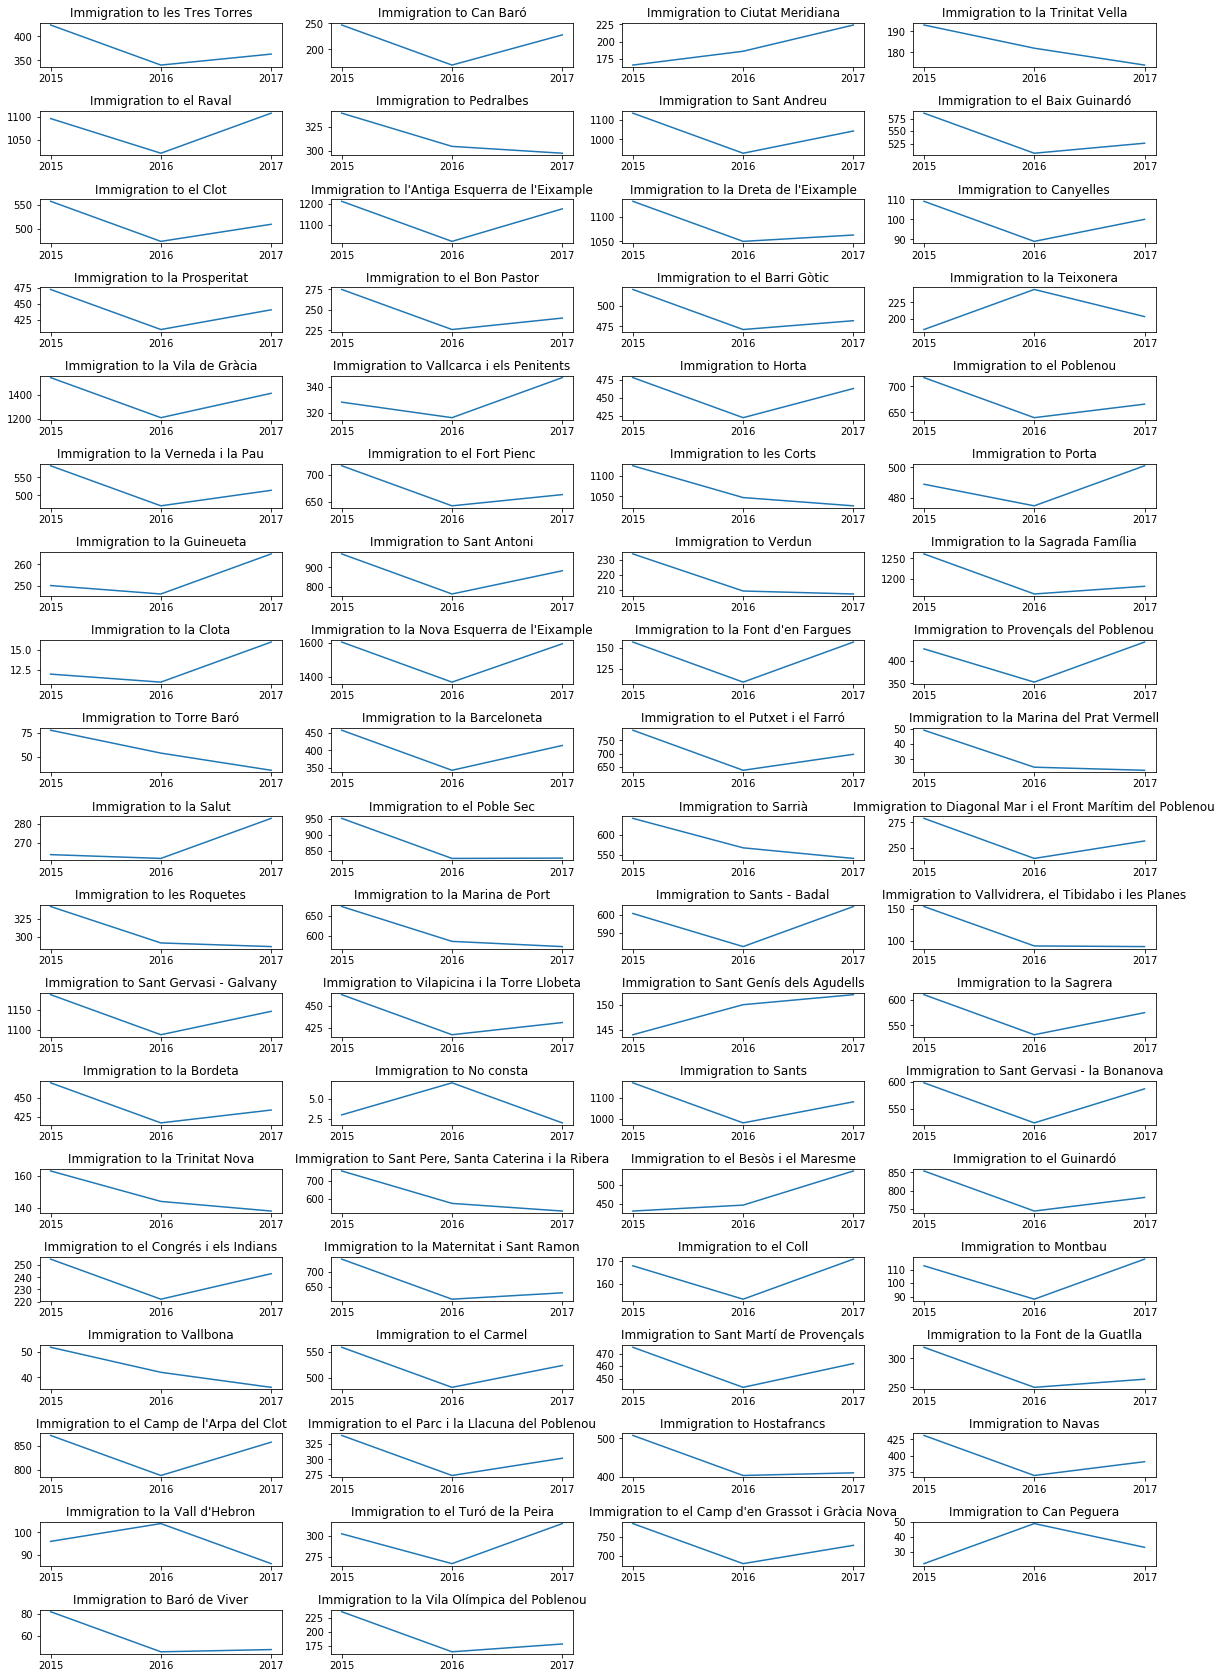

In [72]:
plt.figure(figsize=(20,30))
for plot_ind,neighborhood in enumerate(unique_neighborhoods):
    ax = plt.subplot(int(len(unique_neighborhoods)/4)+1,4,plot_ind+1)
    current_immigrants = spanish_immigrants[spanish_immigrants["Neighborhood Name"]==neighborhood]
    plt.plot(current_immigrants["Year"],current_immigrants["Number"])
    ax.set_xticks(unique_years)
    plt.title("Immigration to " + neighborhood)
plt.subplots_adjust(hspace=1.0)
plt.show()


### Numbers of Immigrates by origin

In [122]:
origin_countries = list(pd.unique(immigrants_nationality["Nationality"]))

In [123]:
immigration_numbers = [sum(immigrants_nationality[immigrants_nationality["Nationality"]==country]["Number"]) for country in origin_countries]

In [128]:
origin_countries = [x for _,x in sorted(zip(immigration_numbers,origin_countries),reverse=True)]

In [129]:
origin_countries

['Spain',
 'Italy',
 'Pakistan',
 'China',
 'Colombia',
 'France',
 'Honduras',
 'Venezuela',
 'Morocco',
 'Peru',
 'Brasil',
 'Argentina',
 'India',
 'Ecuador',
 'United States',
 'Russia',
 'United Kingdom',
 'Dominican Republic',
 'Mexico',
 'Germany',
 'Bolivia',
 'Romania',
 'Ukraine',
 'Chile',
 'Portugal',
 'Philippines',
 'Paraguay',
 'Bangladesh',
 'Georgia',
 'Netherlands',
 'Poland',
 'Cuba',
 'El Salvador',
 'Turkey',
 'Japan',
 'Sweden',
 'Bulgaria',
 'Belgium',
 'Algeria',
 'Uruguay',
 'Armenia',
 'Iran',
 'Nepal',
 'South Korea',
 'Senegal',
 'Nicaragua',
 'Greece',
 'Canada',
 'Hungary',
 'Costa Rica',
 'Egypt',
 'Switzerland',
 'Ireland',
 'Nigeria',
 'Guatemala',
 'Kazakhstan',
 'Syria',
 'Panama',
 'Lebanon',
 'Austria',
 'Denmark',
 'Finland',
 'Israel',
 'Lithuania',
 'Australia',
 'Belarus',
 'Czech Republic',
 'Albania',
 'Norway',
 'Serbia',
 'Croatia',
 'Equatorial Guinea',
 'Ghana',
 'Vietnam',
 'Moldova',
 'Slovakia',
 'Andorra',
 'Latvia',
 'Guinea',
 'No in

In [132]:
immigration_numbers.sort(reverse=True)

<BarContainer object of 177 artists>

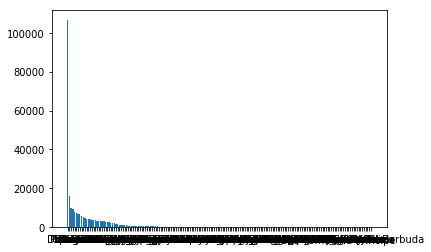

In [133]:
plt.bar(origin_countries,immigration_numbers)

Not so nice looking, so we might want to limit this number to 10 and display the rest as a sum

In [134]:
sum_of_rest = sum(immigration_numbers[10:])

<BarContainer object of 11 artists>

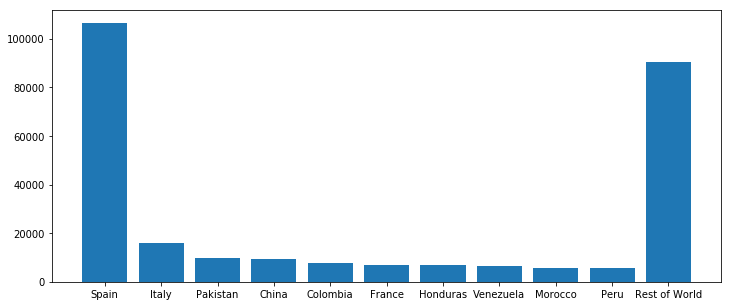

In [138]:
plt.figure(figsize=(12,5))
plt.bar(origin_countries[:10] + ["Rest of World"],immigration_numbers[:10] + [sum_of_rest])

We can see that most migrants to Barcelona are actually fellow Spanish people.

### Plot of Immigration by origin over time

In [150]:
immigration_numbers_by_year = {year:[sum(immigrants_nationality[immigrants_nationality["Nationality"]==country][immigrants_nationality["Year"]==year]["Number"]) for country in origin_countries] for year in unique_years}

/Users/jonathanjanke/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [151]:
immigration_numbers_by_year

{2015: [38026,
  4811,
  3708,
  3091,
  1971,
  2176,
  1880,
  1571,
  1934,
  1416,
  1410,
  1208,
  1371,
  1335,
  1128,
  1322,
  1112,
  1117,
  1119,
  980,
  1147,
  1074,
  1033,
  754,
  741,
  769,
  609,
  593,
  485,
  491,
  421,
  417,
  281,
  258,
  335,
  299,
  282,
  277,
  292,
  216,
  243,
  121,
  170,
  198,
  183,
  165,
  182,
  175,
  195,
  130,
  165,
  153,
  159,
  134,
  138,
  128,
  150,
  92,
  89,
  116,
  91,
  97,
  76,
  83,
  82,
  74,
  85,
  63,
  84,
  76,
  57,
  47,
  80,
  36,
  76,
  59,
  71,
  72,
  101,
  65,
  34,
  49,
  42,
  46,
  43,
  31,
  38,
  41,
  51,
  40,
  26,
  34,
  24,
  24,
  36,
  22,
  11,
  16,
  20,
  29,
  16,
  0,
  13,
  17,
  10,
  19,
  17,
  12,
  37,
  13,
  10,
  10,
  10,
  4,
  3,
  4,
  8,
  7,
  8,
  4,
  9,
  3,
  5,
  3,
  1,
  3,
  5,
  3,
  3,
  1,
  3,
  4,
  4,
  1,
  1,
  2,
  0,
  3,
  0,
  3,
  3,
  2,
  2,
  3,
  1,
  1,
  1,
  0,
  0,
  0,
  2,
  0,
  2,
  0,
  1,
  0,
  1,
  0,
  1,
  1,


/Users/jonathanjanke/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


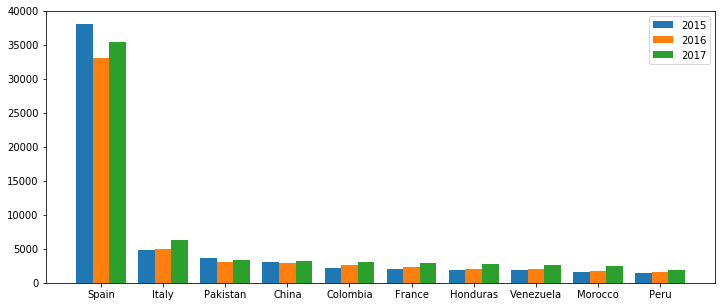

In [193]:
plt.figure(figsize=(12,5))
t = len(immigration_numbers_by_year.keys())
d = len(immigration_numbers)
w = 0.8
for n,year in enumerate(immigration_numbers_by_year.keys()):
    x_values = [t*element + w*n for element in range(d)]
    current_immigration_numbers = immigration_numbers_by_year[year]
    current_immigration_numbers.sort(reverse=True)
    plt.bar(x_values[:10], current_immigration_numbers[:10])
ax = plt.subplot()
ax.set_xticks([0.8 + 3*n for n in range(10)])

ax.set_xticklabels(origin_countries[0:10])
plt.legend(immigration_numbers_by_year.keys())